In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [387]:
class Graph:
    """
    the coordinates of the layers and nodes are like following:
    (2,5) --> the neuron with x = 2 and y = 5. i.e. in the layer 2 and node 5 from buttom
    
    Note that the counting starts with 1.
    
    
    
    
    
    
    """
    
    
    def __init__(self, figsize=(8,5)):
        self.nodes = {} # the keys are layer1, layer2, etc...
                        # the drawinfo keys also contains the margin, y_min, y_max info of each layer
        self.fig = plt.figure(figsize=figsize)
        self.ax = self.fig.add_subplot(111)
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        
        self.n_layers = 0
        self.y_max = 1
        self.y_min = - self.y_max
        self.margin = 1
        self.space = 2
        self.marker_size = 20
        self.L = self.y_max - self.y_min
        
    def draw(self):
        self.draw_nodes_in_layers()
    
    
    def add_node(self, x=1,y=0,text='a',face_color ='#34d5eb', edge_color = 'k' ):
        self.ax.plot(x,y,'o', ms=self.marker_size, mec='k', mfc='#34d5eb')
        self.ax.text(x,y,text, va='center', ha = 'center')
        
    def add_layer(self, layer=1, nodes=4 ,space=0.5):
        if (nodes-1)*self.space + 2*self.margin > self.L :
            self.margin = 1
            self.L = 2 + (nodes-1)*self.space
            self.y_max = self.L/2
            self.y_min = -self.y_max
            self.put_nodes_in_layer(layer,nodes, self.margin, self.L)       
        else:
            self.margin = (self.L - (nodes-1)*self.space)/2
            self.put_nodes_in_layer(layer,nodes, self.margin, self.L)     
        self.update_lims()
                
        
    def put_nodes_in_layer(self, layer ,nodes, margin, L):
        y_max = L/2
        y_min = -y_max
        coor = [[layer,y_min + margin + self.space*i] for i in range(nodes)]
        text = ['{}'.format(i+1) for i in range(nodes)]
        self.nodes['coor_of_layer{}'.format(layer)]  = coor
        self.nodes['text_of_layer{}'.format(layer)]  = text
        self.nodes['drawinfo{}'.format(layer)] = [margin, y_min, y_max]
        self.n_layers +=1
    
    def draw_nodes_in_layers(self):
        for layer_ in range(self.n_layers):
            y_min = self.nodes['drawinfo{}'.format(layer_+1)][1]
            y_max = self.nodes['drawinfo{}'.format(layer_+1)][2]
            margin = self.nodes['drawinfo{}'.format(layer_+1)][0]
            coor = self.nodes['coor_of_layer{}'.format(layer_ +1)]
            text = self.nodes['text_of_layer{}'.format(layer_+1)]
            for i,elem in enumerate(coor):
                self.add_node(elem[0],elem[1],text[i])

    def add_edge(self, pre_x, pre_y, post_x, post_y):
        '''
        add edge to your graph.
        define and array that contains arrays. the sub arrays contain two tupple in which the 
        first tupple is the coordinate of the pre_neuron and the second one is the coordinate of the 
        post neuron. see the following example:
        edge = [[(1,1),(2,1)],[(2,2),(3,1)]] = connections : (1,1)->(2,1); (2,2)->(3,1)
        and you can draw all of them with:
        for elem in edge:
            G.add_edge(*elem[0], *elem[1])
        
        
        '''
        
        coor_pre = self.nodes['coor_of_layer{}'.format(pre_x)][pre_y-1]
        coor_post = self.nodes['coor_of_layer{}'.format(post_x)][post_y-1]
        coors = np.array([coor_pre, coor_post])
        self.ax.plot(coors[:,0], coors[:,1],'k')
                
    def update_lims(self):
        self.ax.set_ylim([self.y_min, self.y_max])


            
    def update_lims(self):
        self.ax.set_ylim([self.y_min, self.y_max])

In [390]:
total_shape = [8,5,3,2,3,5,8]
edge = []

for i, layer_shape in enumerate(total_shape[:-1]):
    for k in range(layer_shape):
        edge += [[(i+1,k),(i+2,k_)] for k_ in range(total_shape[i+1])]


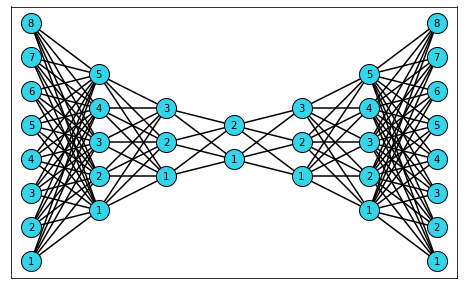

In [391]:
G = Graph()
for i, layer_shape in enumerate(total_shape):
    G.add_layer(i+1, layer_shape)
for elem in edge:
    G.add_edge(*elem[0], *elem[1])
G.draw()

In [203]:
for key, item in a.items():
    print(key, item)

a [12, 3123]
b 3qw
